In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import sympy as sym
from scipy.stats import chi2
import scipy.optimize as spo

import os
import os.path as path
import wget

In [ ]:
pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=853f8476ef4c7c00c32d854649d13fcf57f6a234277f5ca821c1103e36433f6e
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
if not path.exists('Data'):
    os.mkdir('Data')

!rm Data/Minimos.dat

file = 'Data/Minimos.dat'


url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/MinimosCuadratico.txt'

if not path.exists(file):
    Path_ = wget.download(url,file)
    print('File loaded')
else:
    Path_ = file

rm: cannot remove 'Data/Minimos.dat': No such file or directory
File loaded


Lo que se hará es una regresión para datos con incertidumbre

<ErrorbarContainer object of 3 artists>

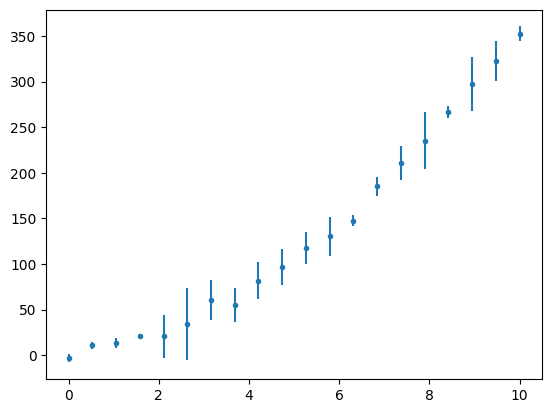

In [ ]:
data = np.loadtxt(Path_)
x = data[:,0]
y = data[:,1]
N = len(x)

sigma = np.random.normal(loc=0,scale=20,size=N)
sigma = np.abs(sigma)
plt.errorbar(x,y,yerr=sigma,fmt='.')

In [ ]:
def GetModel(x,p):

  y = 0
  for n in range(len(p)):
    y += p[n]*x**n

  return y

In [ ]:
def Chi2(p,x,y,sigma):
  return np.sum((y-GetModel(x,p))**2 / (2*sigma**2))

In [ ]:
p0 = np.ones(2)
nll = lambda *p: Chi2(*p)

In [ ]:
result = spo.minimize(nll,p0,args =(x,y,sigma),options={"disp":True})
result

Optimization terminated successfully.
         Current function value: 78.069613
         Iterations: 8
         Function evaluations: 30
         Gradient evaluations: 10


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 78.06961340654448
        x: [-2.203e+01  3.238e+01]
      nit: 8
      jac: [-9.537e-07  2.861e-06]
 hess_inv: [[ 3.625e+00 -6.762e-01]
            [-6.762e-01  2.859e-01]]
     nfev: 30
     njev: 10

In [ ]:
param = result.x
param

array([-22.02557198,  32.37595346])

In [ ]:
_x = np.linspace(np.min(x), np.max(x), 100)
_y = GetModel(_x,param)

In [ ]:
_y

array([-22.02557198, -18.75527365, -15.48497532, -12.21467699,
        -8.94437866,  -5.67408033,  -2.403782  ,   0.86651633,
         4.13681466,   7.40711299,  10.67741132,  13.94770965,
        17.21800798,  20.48830631,  23.75860464,  27.02890297,
        30.2992013 ,  33.56949963,  36.83979796,  40.11009629,
        43.38039462,  46.65069295,  49.92099128,  53.19128961,
        56.46158794,  59.73188626,  63.00218459,  66.27248292,
        69.54278125,  72.81307958,  76.08337791,  79.35367624,
        82.62397457,  85.8942729 ,  89.16457123,  92.43486956,
        95.70516789,  98.97546622, 102.24576455, 105.51606288,
       108.78636121, 112.05665954, 115.32695787, 118.5972562 ,
       121.86755453, 125.13785286, 128.40815119, 131.67844952,
       134.94874785, 138.21904618, 141.48934451, 144.75964284,
       148.02994117, 151.3002395 , 154.57053783, 157.84083616,
       161.11113449, 164.38143281, 167.65173114, 170.92202947,
       174.1923278 , 177.46262613, 180.73292446, 184.00

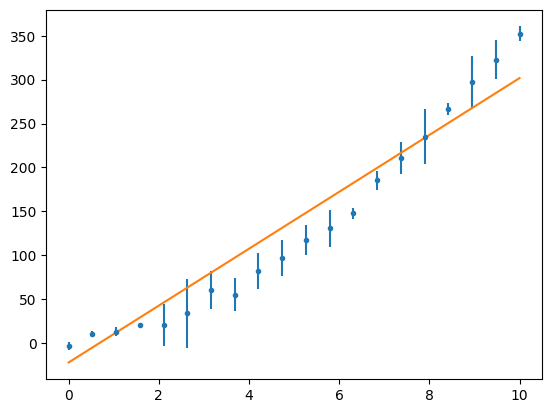

In [ ]:
plt.errorbar(x,y,yerr=sigma,fmt='.')
plt.plot(_x,_y)

In [ ]:
result.fun/(N-len(p0))

0.13785335907870913

In [ ]:
def GetModel(x,p):

  y = p[0]*np.exp(p[1]*x)

  return y

In [ ]:
def Chi2(p,x,y,sigma):
  return np.sum((y-GetModel(x,p))**2 / (2*sigma**2))

In [ ]:
p0 = np.ones(2)
nll = lambda *p: Chi2(*p)

In [ ]:
result = spo.minimize(nll,p0,args =(x,y,sigma),options={"disp":True})
result

         Current function value: 13.537048
         Iterations: 68
         Function evaluations: 344
         Gradient evaluations: 111


  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 13.537048389040525
        x: [ 2.612e+01  2.681e-01]
      nit: 68
      jac: [-1.800e-05 -2.848e-03]
 hess_inv: [[ 4.970e+00 -2.120e-02]
            [-2.120e-02  9.366e-05]]
     nfev: 344
     njev: 111

In [ ]:
param = result.x

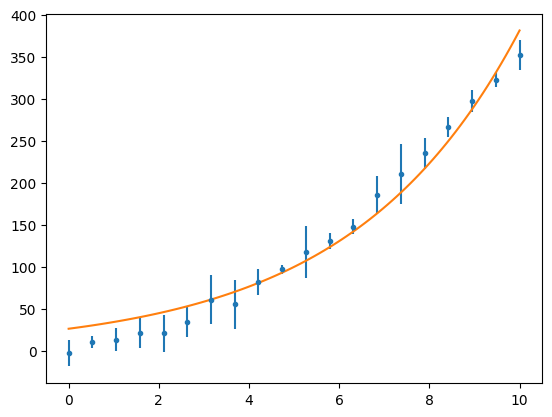

In [ ]:
_x = np.linspace(np.min(x), np.max(x), 100)
_y = GetModel(_x,param)
plt.errorbar(x,y,yerr=sigma,fmt='.')
plt.plot(_x,_y)